<a href="https://colab.research.google.com/github/tomonari-masada/course2024-sml/blob/main/04_nearest_neighbors_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k近傍法
* 直感的には、「どんな友人と付き合っているかを見ればその人が分かる」という考え方にもとづく分類および回帰の手法。
* 新しいデータ点について、対応するターゲットの値を予測する場合、そのデータ点のk個の近傍のクラスを元に予測する。
 * クラスを予測する（分類）の場合、予測は多数決で行われる。
 * 数値を予測する（回帰）の場合、近傍のターゲットの値の平均を予測値とする。（他の方法もありうる。）

## 準備

### インポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

### データファイル
* 特徴量は、「国民一人当たりのGDP (GDP per capita)」と「雇用率 (employment rate)」の、二つを使うことにする。
* ターゲットは、生活満足度。つまり・・・
* 「国民一人当たりのGDP (GDP per capita)」と「雇用率 (employment rate)」を使って、生活満足度を予測する。

* `lifesat_extended.csv`というファイルをColabにアップロードする。

In [2]:
from google.colab import files
files.upload()

Saving lifesat_extended.csv to lifesat_extended.csv


{'lifesat_extended.csv': b'Country,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita\nRussia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,11.0,4.0,70.2,6.0,1.7,20885.0,90.0,0.9,37.0,481.0,14.97,65.0,56.0,16.0,9054.914\nTurkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,21.0,8.1,74.6,5.6,2.37,16919.0,86.0,1.1,68.0,462.0,13.42,88.0,62.0,16.4,9437.372\nHungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,20.0,5.7,75.2,4.9,5.1,20948.0,87.0,1.1,57.0,487.0,15.04,62.0,77.0,17.6,1223

* 国名をインデックスにしてデータフレームを作る。

In [3]:
df = pd.read_csv("lifesat_extended.csv", index_col="Country")
df

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita
Country,,,,,,,,,,,,,,,,,,,,,
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,20885.0,90.0,0.9,37.0,481.0,14.97,65.0,56.0,16.0,9054.914
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,16919.0,86.0,1.1,68.0,462.0,13.42,88.0,62.0,16.4,9437.372
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,20948.0,87.0,1.1,57.0,487.0,15.04,62.0,77.0,17.6,12239.894
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,22655.0,91.0,1.1,58.0,521.0,14.20,55.0,79.0,18.4,12495.334
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,20307.0,90.0,1.1,66.0,472.0,14.99,59.0,81.0,16.3,15991.736
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5,17288.083
Greece,27.0,3.7,6.5,0.7,68.0,6.16,49.0,1.6,18575.0,14579.0,...,25503.0,83.0,1.2,74.0,466.0,14.91,64.0,69.0,18.6,18064.288
Portugal,18.0,5.7,6.5,0.9,38.0,9.62,61.0,1.1,20086.0,31245.0,...,23688.0,86.0,1.6,46.0,488.0,14.95,58.0,86.0,17.6,19121.592
Slovenia,26.0,3.9,10.3,0.5,85.0,5.63,63.0,0.4,19326.0,18465.0,...,32037.0,90.0,1.5,65.0,499.0,14.62,52.0,88.0,18.4,20732.482


* データフレームのさまざまな情報を確認する。

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, Russia to United States
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Air pollution                              29 non-null     float64
 1   Assault rate                               29 non-null     float64
 2   Consultation on rule-making                29 non-null     float64
 3   Dwellings without basic facilities         29 non-null     float64
 4   Educational attainment                     29 non-null     float64
 5   Employees working very long hours          29 non-null     float64
 6   Employment rate                            29 non-null     float64
 7   Homicide rate                              29 non-null     float64
 8   Household net adjusted disposable income   29 non-null     float64
 9   Household net financial wealth             29 non-null     float64
 10  Housing expenditu

In [5]:
df.describe()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,19.241379,3.572414,7.248276,2.400000,77.103448,8.791724,65.896552,1.596552,24302.137931,42052.000000,...,36606.551724,90.068966,1.682759,67.655172,500.931034,14.890345,70.965517,82.896552,17.727586,33391.749138
std,7.224241,1.545476,2.718406,3.801034,15.062595,8.278210,7.788934,2.443867,6133.657664,31325.680935,...,11696.416895,4.795318,0.445669,15.625702,21.142258,0.551333,11.216960,10.624583,1.176829,14650.076056
min,9.000000,1.300000,2.500000,0.000000,34.000000,0.160000,49.000000,0.300000,14095.000000,3251.000000,...,16919.000000,72.000000,0.900000,30.000000,462.000000,13.420000,52.000000,56.000000,15.800000,9054.914000
25%,13.000000,2.200000,5.100000,0.200000,73.000000,3.660000,60.000000,0.600000,19326.000000,18465.000000,...,25503.000000,89.000000,1.400000,65.000000,487.000000,14.610000,64.000000,78.000000,16.800000,19121.592000
50%,18.000000,3.600000,7.100000,0.700000,82.000000,6.160000,67.000000,0.900000,23965.000000,43045.000000,...,36354.000000,90.000000,1.700000,69.000000,500.000000,14.910000,69.000000,85.000000,17.600000,37044.891000
75%,24.000000,4.900000,10.300000,3.200000,88.000000,12.250000,72.000000,1.300000,28307.000000,54987.000000,...,46911.000000,94.000000,1.900000,77.000000,516.000000,15.110000,77.000000,91.000000,18.600000,43724.031000
max,35.000000,6.600000,11.500000,15.100000,94.000000,40.860000,82.000000,12.800000,41355.000000,145769.000000,...,56340.000000,96.000000,2.500000,90.000000,542.000000,16.060000,93.000000,97.000000,19.800000,55805.204000


* GDP per capitaやemployment rateを使って生活満足度を予測するという問題設定が、そもそも妥当な問題設定かどうか、確認する。
 * 特徴量とターゲットとのあいだに、ある程度の関連性がないと、解けない問題を解こうとしていることになる。

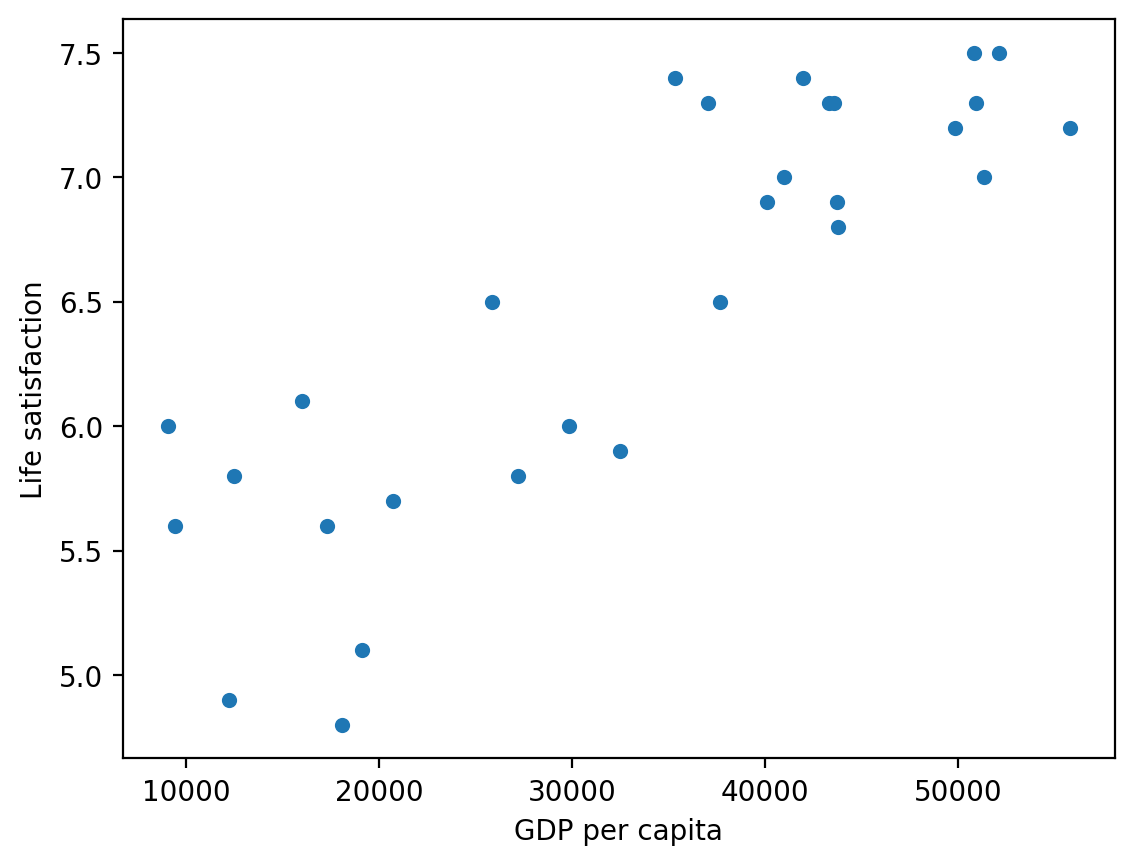

In [6]:
df.plot(kind='scatter', x='GDP per capita', y='Life satisfaction');

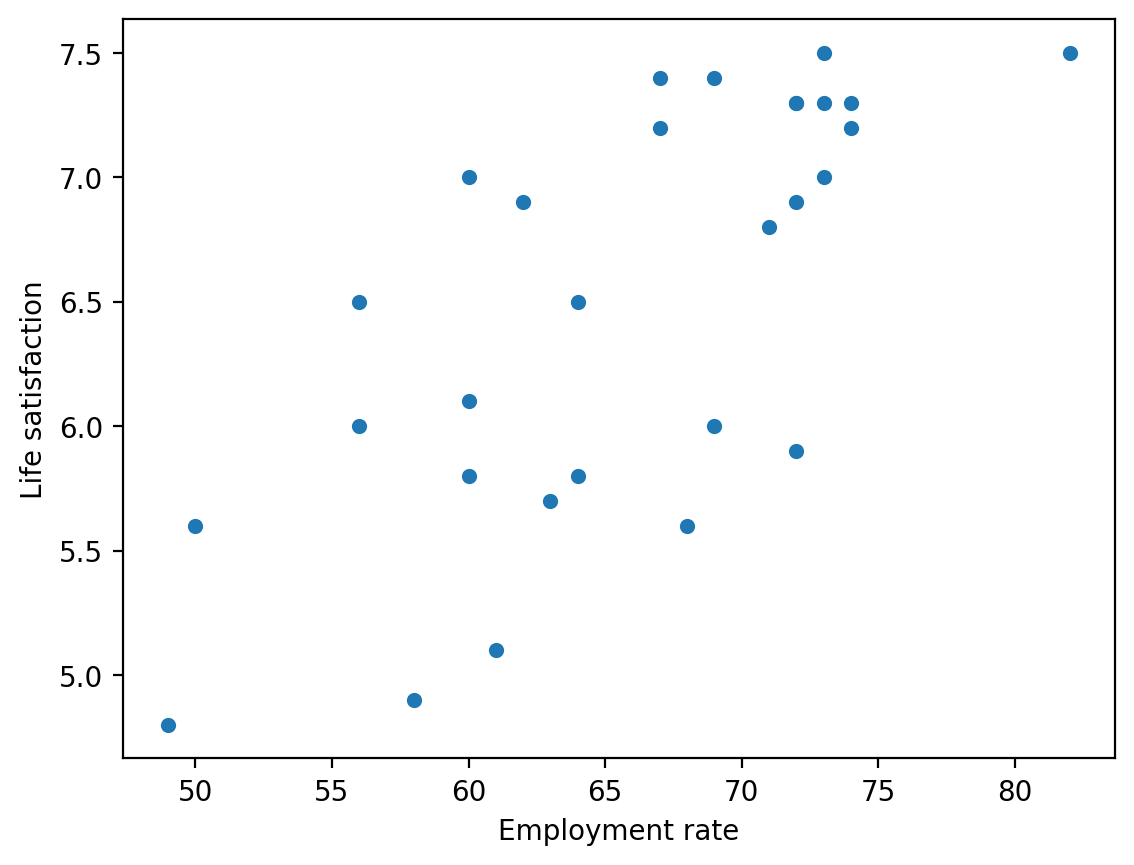

In [7]:
df.plot(kind='scatter', x='Employment rate', y='Life satisfaction');

## 今回の問題設定
* 日本の生活満足度を予測したい、とする。
  * もちろん、すでに答えは分かっているが・・・
  * ここでは、日本の生活満足度の予測を、解きたい問題として設定する。
* 言い換えれば、日本のデータが、テストデータとなる。
  * テストデータ＝最終的に手法の性能を評価するために使うデータ集合。
  * テストデータでの評価結果を見て、手法のチューニングへ戻ってきてはいけない。
* そこで、日本を除外したデータフレームを作り、それを使う。

In [15]:
df_train = df.drop(['Japan'])
df_test = df.loc[['Japan']]

In [16]:
df_train

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita
Country,,,,,,,,,,,,,,,,,,,,,
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,20885.0,90.0,0.9,37.0,481.0,14.97,65.0,56.0,16.0,9054.914
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,16919.0,86.0,1.1,68.0,462.0,13.42,88.0,62.0,16.4,9437.372
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,20948.0,87.0,1.1,57.0,487.0,15.04,62.0,77.0,17.6,12239.894
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,22655.0,91.0,1.1,58.0,521.0,14.20,55.0,79.0,18.4,12495.334
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,20307.0,90.0,1.1,66.0,472.0,14.99,59.0,81.0,16.3,15991.736
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5,17288.083
Greece,27.0,3.7,6.5,0.7,68.0,6.16,49.0,1.6,18575.0,14579.0,...,25503.0,83.0,1.2,74.0,466.0,14.91,64.0,69.0,18.6,18064.288
Portugal,18.0,5.7,6.5,0.9,38.0,9.62,61.0,1.1,20086.0,31245.0,...,23688.0,86.0,1.6,46.0,488.0,14.95,58.0,86.0,17.6,19121.592
Slovenia,26.0,3.9,10.3,0.5,85.0,5.63,63.0,0.4,19326.0,18465.0,...,32037.0,90.0,1.5,65.0,499.0,14.62,52.0,88.0,18.4,20732.482


* テストデータは、最後にチューニング済みの手法を評価する時まで、使わない。

In [17]:
df_test

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita
Country,,,,,,,,,,,,,,,,,,,,,
Japan,24.0,1.4,7.3,6.4,94.0,22.26,72.0,0.3,26111.0,86764.0,...,35405.0,89.0,1.8,30.0,540.0,14.93,53.0,85.0,16.3,32485.545


### 特徴量とターゲットの用意

* 特徴量である(一人当たりのGDP, 雇用率)と、ターゲットである生活満足度とを、別々に保存する。

In [12]:
X = df_train[['GDP per capita', 'Employment rate']]
y = df_train['Life satisfaction']

In [13]:
X

,GDP per capita,Employment rate
Country,,
Russia,9054.914,69.0
Turkey,9437.372,50.0
Hungary,12239.894,58.0
Poland,12495.334,60.0
Slovak Republic,15991.736,60.0
Estonia,17288.083,68.0
Greece,18064.288,49.0
Portugal,19121.592,61.0
Slovenia,20732.482,63.0


In [19]:
y

Country
Russia             6.0
Turkey             5.6
Hungary            4.9
Poland             5.8
Slovak Republic    6.1
Estonia            5.6
Greece             4.8
Portugal           5.1
Slovenia           5.7
Spain              6.5
Korea              5.8
Italy              6.0
Israel             7.4
New Zealand        7.3
France             6.5
Belgium            6.9
Germany            7.0
Finland            7.4
Canada             7.3
Netherlands        7.3
Austria            6.9
United Kingdom     6.8
Sweden             7.2
Iceland            7.5
Australia          7.3
Ireland            7.0
Denmark            7.5
United States      7.2
Name: Life satisfaction, dtype: float64

# 演習

## k近傍法の実装（k=1の場合）

* 以下では、例題として、韓国の生活満足度の予測を考える。
  * そして、テストデータ上での生活満足度の予測をうまくいかせるために・・・
  * k近傍法をどのように使えばよいか、チューニングしていく。

* k=1に設定してk近傍法を使うとはどういうことか？
  * 韓国に最も近い国を求める。
  * 韓国に最も近い国の生活満足度をもって、韓国の生活満足度の予測値とする。

* 韓国に最も近い国を、どうやって選べばいいだろうか？

In [18]:
X.loc[['Korea']]

,GDP per capita,Employment rate
Country,,
Korea,27195.197,64.0


* なお、以下のようにすれば、インデックス、つまり国名を枚挙できる。

In [ ]:
for country in X.index:
  print(country)

Russia
Turkey
Hungary
Poland
Slovak Republic
Estonia
Greece
Portugal
Slovenia
Spain
Korea
Italy
Israel
New Zealand
France
Belgium
Germany
Finland
Canada
Netherlands
Austria
United Kingdom
Sweden
Iceland
Australia
Ireland
Denmark
United States


* 以下のようにすれば、各国の特徴量をNumpyの配列として枚挙できる。

In [ ]:
for country in X.index:
  print(X.loc[country].values)

[9054.914   69.   ]
[9437.372   50.   ]
[12239.894    58.   ]
[12495.334    60.   ]
[15991.736    60.   ]
[17288.083    68.   ]
[18064.288    49.   ]
[19121.592    61.   ]
[20732.482    63.   ]
[25864.721    56.   ]
[27195.197    64.   ]
[29866.581    56.   ]
[35343.336    67.   ]
[37044.891    73.   ]
[37675.006    64.   ]
[40106.632    62.   ]
[40996.511    73.   ]
[41973.988    69.   ]
[43331.961    72.   ]
[43603.115    74.   ]
[43724.031    72.   ]
[43770.688    71.   ]
[49866.266    74.   ]
[50854.583    82.   ]
[50961.865    72.   ]
[51350.744    60.   ]
[52114.165    73.   ]
[55805.204    67.   ]


* 以下、まずは簡単のため、雇用率はしばらく使わないことにし・・・
* 一人当たりのGDPだけを各国の特徴量として、生活満足度の予測を行うコードを書くことにする。

### 演習問題1: 一人当たりのGDPが、韓国に最も近い国を求めてみよう。

### 演習問題2: 上で求めた国の生活満足度を、韓国の生活満足度の予測値としたとき、予測誤差はいくらか。

## k近傍法の実装 （kの値が任意の場合）

* kの値が2以上の場合のk近傍法を実装する。
* そして、kの値がいくらのときに最も予測性能が良くなるかを調べることで・・・
* kの値をチューニングする。

### 演習問題3: 全ての国について、一人当たりのGDPを使って計算される韓国との距離を求めよう。

### 演習問題4: 韓国の一人当たりのGDPに近い順に、他の全ての国を並べ替えて表示させよう。

### 演習問題5: 変数kに近傍の個数が代入されている。韓国のk個の近傍の国名を、韓国に近い順に表示させよう。

In [ ]:
k = 5
# ここに続きを書く

### 演習問題6: 上で求めたk個の国について、それらの国の生活満足度の*平均値*を求めよう。

### 演習問題7: 上の平均値を、韓国の生活満足度の予測値とした場合、予測誤差はいくらか。

# 今日の課題

### 課題1
* 変数kの値を、1から27まで変化させたとき、最も予測誤差が小さくなるのは、kの値がいくらのときか。

### 課題2
* 一人当たりのGDPを使うのではなく、雇用率を使って生活満足度の予測を行ったとき、最も予測誤差を小さくするkの値はいくらか。